# **Tutorial 1: Linear Regression**

---




**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ 

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___
# **Tutorial Objectives**

*Estimated timing of tutorial: 20 minutes [?]

Welcome to tutorial 1 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial, we will start with simple linear regression and learn how to model data using this technique. Specifically, by the end of this tutorial, you will be able to:

- Understand what linear regression is and how it can be used to model data
- Implement linear regression using scikit-learn in Python
- Evaluate the performance of a linear regression model 
- Apply the learned linear regression model to make predictions on new, unseen data

This tutorial serves as the foundation for the upcoming tutorials in this series, where we will cover other data modeling techniques and apply them to climate and environmental data. Specifically, in the upcoming tutorials, we will:

- Learn about logistic regression using scikit-learn in tutorial 2
- Get familiar with the dengue fever dataset in tutorial 3
- Apply linear regression to the dengue fever dataset in tutorial 4
- Learn about decision trees and apply them to the dengue fever dataset in tutorial 5
- Get introduced to a small crop dataset in tutorial 6
- Apply logistic regression to the crop dataset in tutorial 7
- Learn how artificial neural networks can be applied to crop data in tutorial 8
- Identify where more datasets and ideas can be found in tutorial 9



---

In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---
# **Setup**

In [ ]:
#@title Import necessary libraries:

import numpy as np  # Import the numpy library as np - used for array computing and linear algebra operations
from sklearn.linear_model import LinearRegression  # Import the LinearRegression class from the sklearn.linear_model module - used for performing linear regression analysis
import matplotlib.pyplot as plt  # Import the pyplot module from the matplotlib library - used for data visualization

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
**NOTE :**  Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a "`ModuleNotFoundError: No module named 'library name'`" error , please run "`pip install 'library name'`" to install the required module.

---

# **Section 1: Linear Regression**


---


Implementing Linear Regression on synthetic dataset

In [ ]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

In a regression problem, we need data features ('regressors', or independent variables) that we will use to predict a dependent variable. For example, we could try to predict an employee's salary (dependent variable) based on features such as the number of years at the company and performance ratings (regressors). 

To try out linear regression with scikit-learn, we will start with synthetic data. Linear regression assumes there is a linear relationship between the regressors and the predicted value, so we will simulate data that does have such a linear relationship.  Specifically, we will build data with the following relationship:
\begin{align}
 y = \beta x_1 + (1-\beta) x_2 + \alpha \epsilon 
\end{align}

where y is the dependent variable, and $x_1$ and $x_2$ are regressors. $\beta$ can range from 0 to 1; it is a weighting variable that controls the relative influence from each regressor (at .5, both regressors contribute equally). $\epsilon$ is a noise term that makes $y$ only partially dependent on these regressors. The strength of the noise is controlled by $\alpha$.  

Let's start by setting some values for the regressors. We will build them to have 0 mean.



---


## **Section 1.1:  Generating a Synthetic Dataset**

---

This code generates two arrays of random numbers using the numpy library's random module. The `data_point`s variable is used to define the length of the generated arrays, and the `random.randn()` function is used twice to generate the arrays. The numpy library was previously imported and given the alias "np" for ease of use. The generated random numbers can be useful in various scientific and engineering applications.

In [ ]:
#@title Generating regressors value 'x1' and 'x2' with NumPy

# Importing the numpy library with the alias "np" earlier in the code
# Numpy is a popular library used for numerical computing and mathematical operations in Python

data_points = 100   # Defining the number of data points to generate

x_1 = np.random.randn(data_points)   # Generating an array of 'data_points' numbers from a normal distribution with zero mean using numpy's 'random.randn()' function, and saving it to 'x_1'
# 'random.randn()' function is a part of numpy's random module and generates an array of random numbers from a standard normal distribution (mean = 0, standard deviation = 1)

x_2 = np.random.randn(data_points)   # Generating another array of 'data_points' numbers from a normal distribution with zero mean using numpy's 'random.randn()' function, and saving it to 'x_2'
# We are again using the 'random.randn()' function from numpy's random module to generate another array of random numbers from a standard normal distribution. This time we are saving it to 'x_2' variable. 

# By using the numpy library's random module, we can generate random numbers efficiently, which is often useful in many scientific and engineering applications.


Now we can choose some weighting values and calculate the dependent variable:

In [ ]:
#@title Generating dependent variable  'y'


beta = .5   # Defining the weight for the first regressor
alpha = .1    # Defining the weight for the noise

def y_func(weights, regressors, noise):
    """
    This function takes in three inputs: 
    - weights: a numpy array of weights (1 x r, where r is number of regressors)
    - regressors: a numpy array of regressors (r x d, where d is number of datapoints)
    - noise: a scalar value representing the amount of noise to be added to the output.
    
    The function returns the dot product of 'weights' and 'regressors', plus some added noise (controlled by 'noise').
    """
    # The dot product of weights and regressors is calculated using numpy's 'dot' function. Then, noise is added to the result using numpy's 'random.randn()' function.
    return np.dot(weights, regressors) + noise * np.random.randn(regressors.shape[1])

# Calling the function 'y_func' to generate 'y', using the variables 'alpha', 'beta', and 'x_1', 'x_2' that were previously defined.
y = y_func(np.array([beta, 1-beta]), np.array([x_1, x_2]), alpha)
print(y)

[-0.77132941 -0.70816413 -0.74100481 -0.27356173  0.12797774  0.80843641
 -0.28694598  0.40351788 -0.06815841 -0.08632922  0.61163622 -0.26486681
 -0.57318687  1.19155439  1.12637045  0.50685638 -1.11536777  0.86722547
 -0.20958742  1.01988304 -0.45580615  0.34551184  0.1531657  -0.42017884
 -0.9537595  -0.13373608  0.71203078 -1.136208    0.90440576 -0.34204456
 -0.84830853  0.29919082  1.00668968 -0.54528769  0.46639543 -0.51942561
 -1.09009268  0.38048943  0.33560505 -0.23467536  0.35262932 -0.85329568
  0.24741775  0.89776859  0.16149161  0.16474905 -0.46211826 -0.77732568
 -0.12328792  0.25133921 -0.38550687 -0.86209469 -0.48599479  0.99983743
 -0.36035813  1.21875363  0.31526245 -0.42124387 -0.55310704 -0.62364832
  0.31248758  0.05544358  1.16290769 -0.56293945 -0.55682249 -0.17309071
 -0.37143537  1.05271536  0.17844357  0.03275857 -0.00269952  0.26420128
 -0.72842743 -0.16094987  0.4104476   1.26827761 -0.48322571 -0.29964764
 -0.77351577 -1.09741614  0.57631035 -1.06401933  0

The code generates a dependent variable 'y' by calling a function 'y_func()'. The function takes in weights, regressors, and noise as inputs, calculates the dot product of weights and regressors using numpy's 'dot' function, adds noise to the result using numpy's 'random.randn()' function, and returns the final result. The 'y_func()' function is called using previously defined variables 'beta', 'alpha', and 'x_1', 'x_2'.

### **Plotting the data**

To fully understand what this function represents, we can plot the relationship between the regressors and y. Change the values of $alpha$ and $beta$ and see how it impacts these plots. 

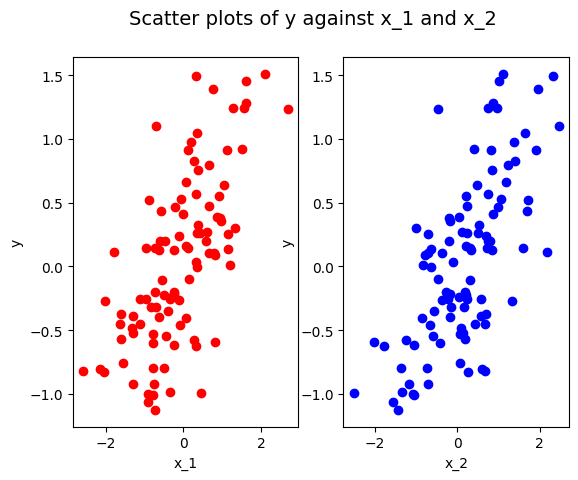

In [ ]:
# Creating a figure with two subplots
plt.subplot(1, 2, 1)         # The first subplot
plt.scatter(x_1, y, c='r')   # Creating a scatter plot of x_1 vs. y, with the color 'red'
plt.ylabel('y')              # Adding a y-axis label to the plot
plt.xlabel('x_1')            # Adding an x-axis label to the plot
  
plt.subplot(1, 2, 2)         # The second subplot
plt.scatter(x_2, y, c='b')   # Creating a scatter plot of x_2 vs. y, with the color 'blue'
plt.ylabel('y')              # Adding a y-axis label to the plot
plt.xlabel('x_2')            # Adding an x-axis label to the plot

plt.suptitle('Scatter plots of y against x_1 and x_2', fontsize=14)  # Adding a title to the overall figure
plt.show()  # Displaying the plot




---


## **Section 1.2 Fitting Model and Analyzing Results**

---



Now we can test if linear regression can find these relationships between the regressors and the dependent variable and use it to predict $y$ values from new $x$ values. Let's start by making a dataset with $\beta=.8$ and $\alpha=.1$ 

In [ ]:
beta = .8   # Defining the weight for the first regressor
alpha = .1    # Defining the weight for the noise
regressors = np.array([x_1, x_2])   # Creating an array of regressors (x_1 and x_2)

# Calling the function 'y_func' to generate 'y', using the variables 'alpha', 'beta', and 'regressors' that were previously defined.
y = y_func(np.array([beta, 1-beta]), regressors, alpha)


Then we can train a linear regression model. In scikit-learn, models are objects. So we first define a linear regression object and then train it with our synthetic data. 

In [ ]:
#here we will use 'LinearRegression' from 'sklearn.linear_model' which we imported earlier

reg_model = LinearRegression()   # Creating a new instance of the LinearRegression class and assigning it to the variable 'reg_model'

# Training the model using the fit() method of the LinearRegression class
reg_model.fit(regressors.T, y)
# Note that the regressors are transposed using the .T method to conform to the scikit-learn convention of having datapoints as rows and regressors as columns

LinearRegression()

The model has now been trained with our synthetic data. But we want to see if it has done a good job finding the relationships between these variables. 

We will first evaluate the coefficient of determination of the model fit. This is a measure of how much of the variability in the data the model has captured. It is also known as $R^2$ ("R-squared"). 1 is the best possible value. 

We will also look at the coefficients that the model has learned for each regressor.

In [ ]:
reg_model.score(regressors.T, y)   # Calling the score() method of the LinearRegression class on the trained model 'reg_model' to get the coefficient of determination

0.9899372733188474

In [ ]:
reg_model.coef_   # Accessing the 'coef_' attribute of the trained model 'reg_model' to get the coefficients (or weightings) of each regressor

array([0.79694069, 0.19016634])

As we can see, the model has a high coefficient of determination and does a good job of recovering the regressor weights (which we had set to .8 and 1 - .8 = .2). You can increase the amount of noise in the data and see how this impacts these results. 

We have just evaluated the model on the exact same data points that we trained it on. This is not necessarily a good indication of how well it will perform on new data it hasn't seen before. Let's make two new data sets and test how well the trained model performs on them. In the first, the relationship between the x and y values will remain the same and we will just sample new x values.



---


## **Section 1.3 Test the model on new unseen x values**


---



0.9884047786203449

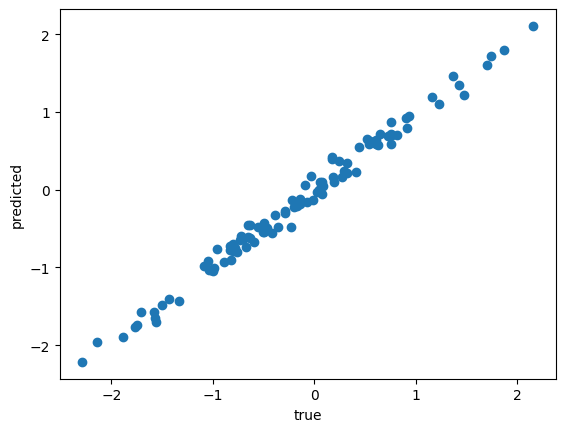

In [ ]:
x_1_test1 = np.random.randn(data_points)   # Creating a new array of x_1 values using the same normal distribution as before
x_2_test1 = np.random.randn(data_points)   # Creating a new array of x_2 values using the same normal distribution as before

# Creating a new array of regressors (x_1_test1 and x_2_test1) to test the model's predictions
regressors_test1 = np.array([x_1_test1, x_2_test1])

# Getting the model's predictions on the new x values by calling the predict() method of the LinearRegression object
preds_test1 = reg_model.predict(regressors_test1.T)

# Assuming the same relationship of alpha=.8 and beta=.1 as set above, we can calculate the true y values
y_test1 = y_func(np.array([beta, 1-beta]), regressors_test1, alpha)

# Visualizing how aligned the predicted and true values are by creating a scatter plot
plt.scatter(y_test1, preds_test1)
plt.xlabel('true'); plt.ylabel('predicted')

# Calculating the coefficient of determination (R^2) using the score() method of the LinearRegression object
reg_model.score(regressors_test1.T, y_test1)


As the plot and the coefficient of determination show, the model does well on this new data! 

But what if something changed between when we collected data to train the model and when we collected a second data set to test it on? Then the relationship between x and y may have changed. Would the model still work well?



---


## **Section 1.4: Check the model on a new dataset with a slightly different relationship.**


---



0.6972231036485299

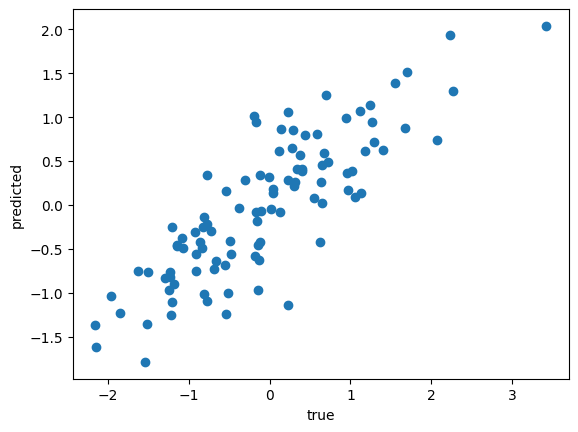

In [ ]:
## Section 1.3: Check the model on a new dataset with a slightly different relationship.

x_1_test2 = np.random.randn(data_points)
x_2_test2 = np.random.randn(data_points)

#Get the model's predictions on these new x values
regressors_test2 = np.array([x_1_test2, x_2_test2])
preds_test2 = reg_model.predict(regressors_test2.T)

#Assuming a different relationship (alpha = .6), we can calculate the true y values:
alpha = .6
y_test2 = y_func(np.array([beta, 1-beta]), regressors_test2, alpha)

plt.scatter(y_test2, preds_test2) #visualizing how aligned the predicted and true values are
plt.xlabel('true'); plt.ylabel('predicted')
reg_model.score(regressors_test2.T, y_test2) #coef of determination


Now the model does not perform as well. This idea, that a model that performs well on the data it was trained on may not always generalize to new data, is an important concept in machine learning. It means we must always be careful when we make claims about how well a model performs or assumptions about how useful it will be in diverse circumstances. 



---


# **Summary**

Estimated timing of tutorial: 

In this tutorial, we learned about how linear regression was used to find relationships between regressor and dependent variables. We also discussed the importance of being cautious in making assumptions about the usefulness of models trained on specific data, as their performance could vary when applied to new data.


---

